In [54]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
def mean_reversion(window:int):
    data["Close"].plot(title=f"{ticker} closing price")
    plt.show()
    data["SMA"] = data["Close"].rolling(window=window).mean()
    data["Signal"] = [0]*len(data["SMA"])
    data["Signal"] = (data["SMA"] > data["Close"][ticker]).astype(int)
    data.loc[data["Close"][ticker] > data["SMA"], "Signal"] = -1

    data["Position"] = data["Signal"]
    data["Position"] = data["Position"].replace(to_replace=0, method='ffill')
    data.loc[data["Signal"] == -1, "Position"] = 0


    # Plot sell and buy
    plt.plot(data["Close"], label="Price")
    
    # Mark Buy
    plt.scatter(data[data["Signal"] == 1].index, 
                data[data["Signal"] == 1]["Close"], 
                label="Buy", marker="^", color="green")
    
    # Mark Sell
    plt.scatter(data[data["Signal"] == -1].index, 
                data[data["Signal"] == -1]["Close"], 
                label="Sell", marker="v", color="red")
    
    plt.legend()
    plt.title("Buy/Sell Points")
    plt.show()

def backtest_mean_reversion():
    data["Daily Return"] = data["Close"].pct_change()
    data["Strategy Return"] = data["Daily Return"] * data["Position"]
    (1 + data["Strategy Return"]).cumprod().plot(label="Strategy", color='blue')
    (1 + data["Daily Return"]).cumprod().plot(label="Buy & Hold", color='red')
    plt.legend()
    plt.title("Backtest")

[*********************100%***********************]  1 of 1 completed


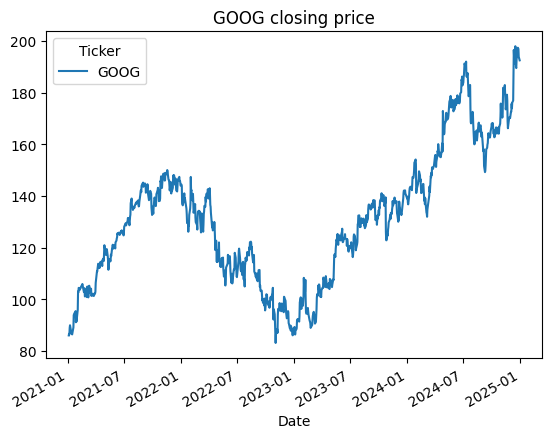

/tmp/ipykernel_74636/4034138184.py:10: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data["Position"] = data["Position"].replace(to_replace=0, method='ffill')


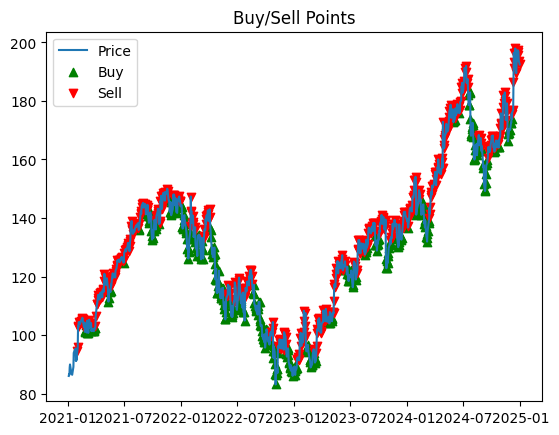

In [58]:
ticker = "GOOG"
data = yf.download(ticker, start="2021-01-01", end="2024-12-31")
mean_reversion(20)

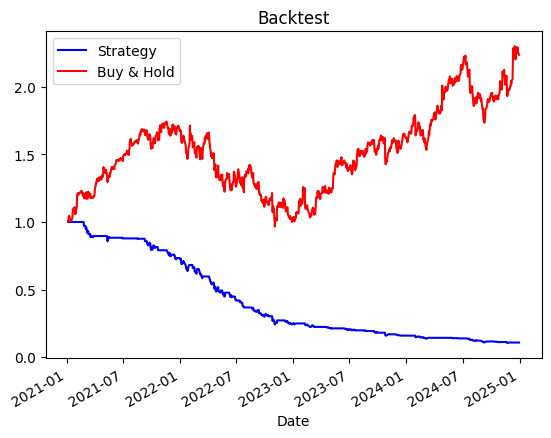

In [59]:
backtest_mean_reversion()

[*********************100%***********************]  1 of 1 completed


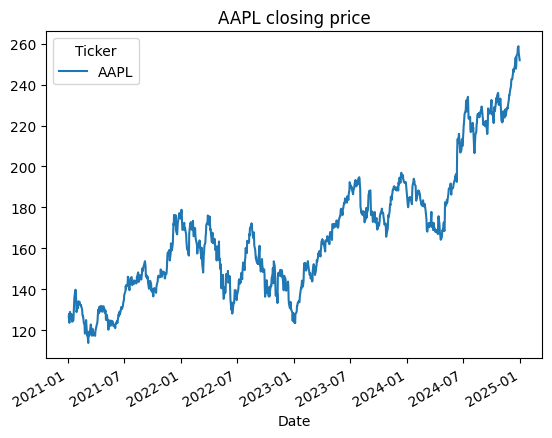

/tmp/ipykernel_74636/4034138184.py:10: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data["Position"] = data["Position"].replace(to_replace=0, method='ffill')


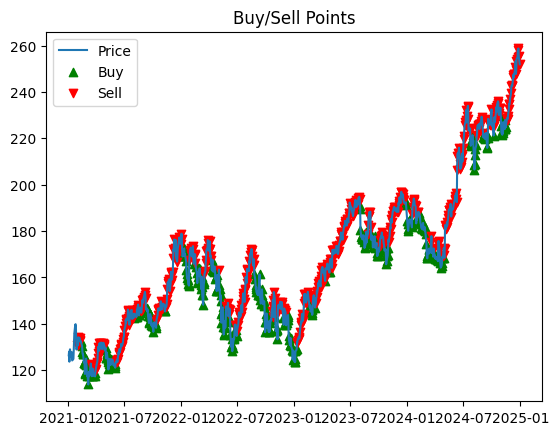

In [60]:
ticker = "AAPL"
data = yf.download(ticker, start="2021-01-01", end="2024-12-31")
mean_reversion(20)

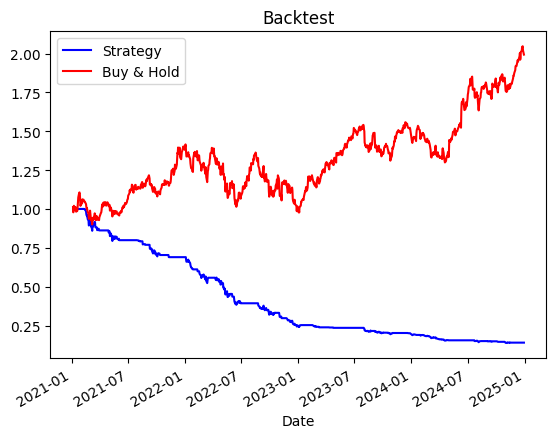

In [61]:
backtest_mean_reversion()